In [30]:
#Importing the neccessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [31]:
df = pd.read_csv(r"C:\Users\HP\Downloads\fake_news_dataset.csv")

In [32]:
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [33]:
df['label'].value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

In [34]:
X = df['text'] 
y = df['label']

In [35]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.33,random_state=42) 

In [36]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier

In [37]:
pipeline = Pipeline([
    ('TfidVectorizor', TfidfVectorizer()),
    ('model', RandomForestClassifier()) 
]) 
pipeline.fit(X_train,y_train)

Pipeline(steps=[('TfidVectorizor', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [38]:
pipeline.score(X_train,y_train)

0.999966756424321

In [39]:
pipeline.score(X_test,y_test)

0.9873793615441723

In [40]:
y_pred = pipeline.predict(X_test) 

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
cm = confusion_matrix(y_pred,y_test)

<Axes: >

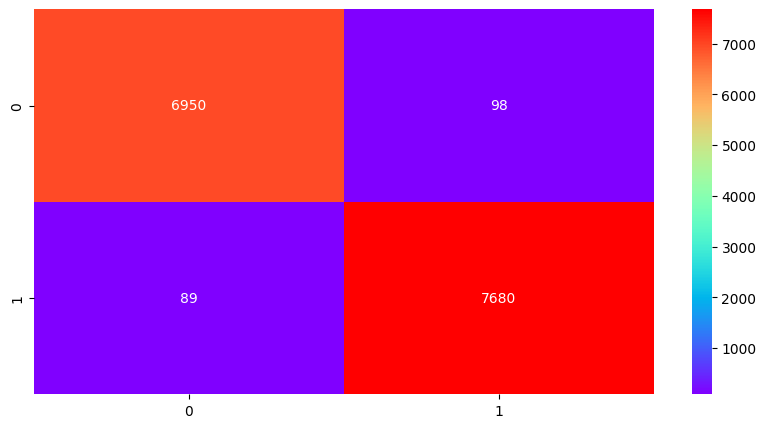

In [43]:
plt.figure(figsize=(10,5)) 
sns.heatmap(cm,annot=True,cmap='rainbow',fmt='d')

In [44]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      7048\n           1       0.99      0.99      0.99      7769\n\n    accuracy                           0.99     14817\n   macro avg       0.99      0.99      0.99     14817\nweighted avg       0.99      0.99      0.99     14817\n'

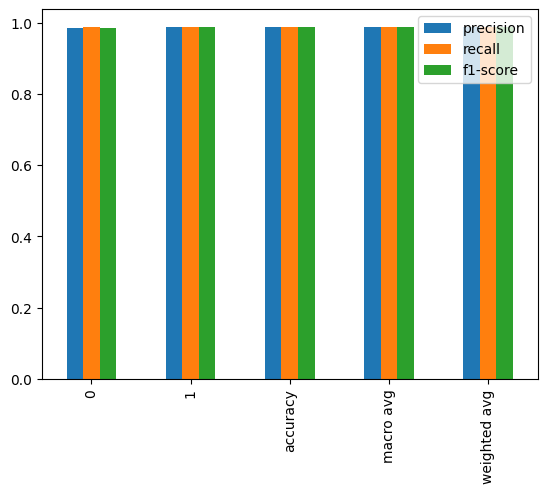

In [47]:

# Assume y_true and y_pred are already available
report = classification_report(y_test, y_pred, output_dict=True)
data = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score
data[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.show()
